In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pytesseract

In [2]:

filePath = './imageFile/'
fileName = 'pic (2).jpg'
img_ori = cv2.imread(filePath + fileName)
# img_ori2 = cv2.imread(imagePath + 'pic (2).jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
height, width, channel = img_ori.shape  # 컬러는 3개의 자료 반환
# height, width = img_ori2.shape            # 흑백은 2개의 자료 반환, 그래서 채널이 없다.

In [ ]:
# 잘 가져와졌나 확인해보기
plt.figure(figsize=(12, 10))
plt.axis('off')
plt.imshow(img_ori, cmap='gray')

hue/ saturation/ value
색상, 채도, 명도

참고 : 먼셀표색계 hvc
hue, value, chrome(채도)

[[107 127 118 ...  86  93  97]
 [121 125 117 ...  89  94  92]
 [122 122 120 ...  88  96  94]
 ...
 [ 54  52  50 ... 184 187 187]
 [ 60  51  39 ... 180 187 184]
 [ 52  44  33 ... 182 186 183]]


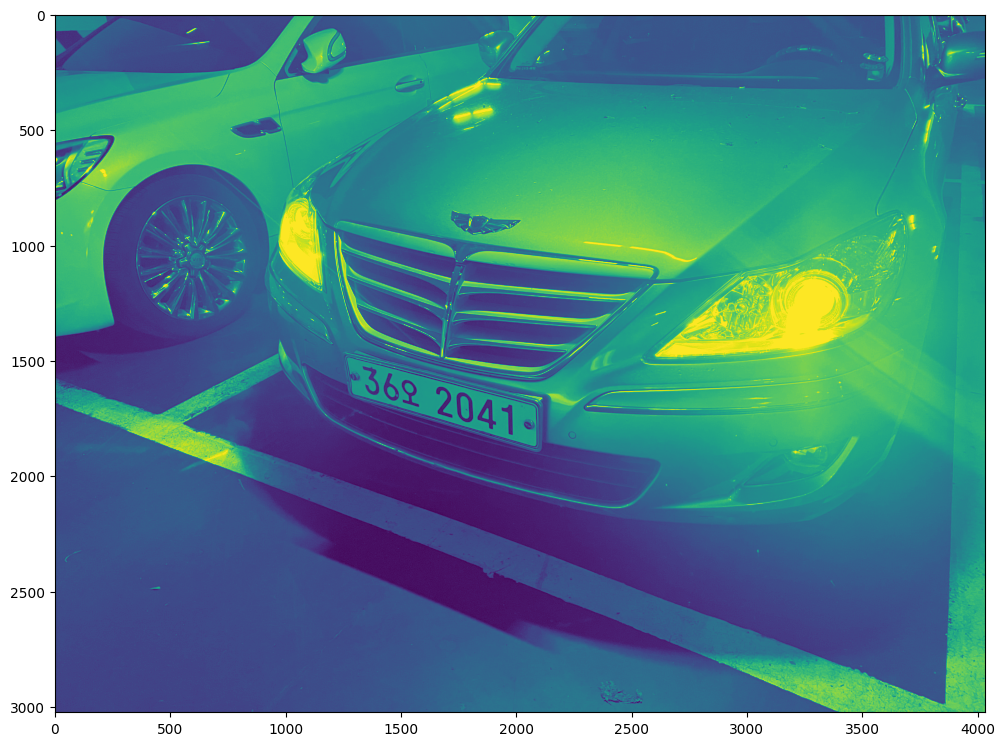

In [4]:
# # 흑백으로 만들기 위해 hsv로 만들어서 value 채널만 사용하는 경우도 있다. 흑백으로 plot이 잘 되지 않는다
# hsv = cv2.cvtColor(img_ori, cv2.COLOR_BGR2HSV)
# gray = hsv[:,:,2]

# print(gray)
# plt.figure(figsize=(12,10))
# plt.imshow(gray)

In [15]:
# gray = cv2.cvtColor(img_ori,cv2.COLOr_brg2gray)  # atrribute가 존재하지 않는다. 에러/ 아래 코드를 참조하시오.
# plt.figure(figsize=(12,10))
# plt.imshow(gray)

AttributeError: module 'cv2' has no attribute 'COLOR_BRG2GRAY'

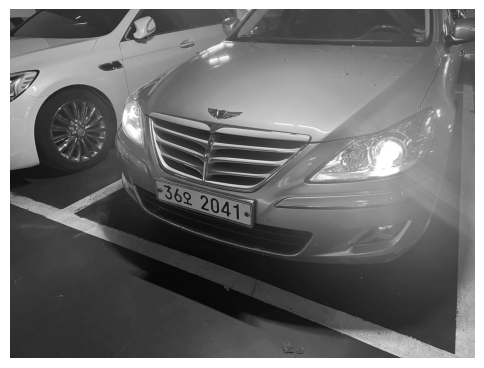

In [4]:
# 수정된 코드
gray = cv2.cvtColor(img_ori, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(6,5))
plt.axis('off')
plt.imshow(gray, cmap='gray')

In [ ]:
# img_ori3 = cv2.imread((filePath + fileName), 0)  # 흑백으로 가져오기
# imgray3 = cv2.cvtColor(img_ori3, cv2.IMREAD_GRAYSCALE)
# plt.figure(figsize=(12, 10))
# plt.axis('off')
# plt.imshow(imgray3)  # 주피터노트북에서는 plt.show() 생략가능

## Adaptive Thresholding
threshold : 기준점, 입구, 한계점
threshold value : 역치, 한계치

- 가우시안 블러 : 노이즈 줄이기

- 스레숄더 : 검은 것은 검게, 흰것은 희게 + 만화처럼 보이게 한다. 테두리만 나와서 컴퓨터가 쉽게 인식한다.

In [5]:
imgBlurred = cv2.GaussianBlur(gray, ksize=(5,5),sigmaX=0)


In [6]:
imgBlurThresh = cv2.adaptiveThreshold(imgBlurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9)
# plt.figure(figsize=(12,10))
# plt.axis('off')
# plt.imshow(imgBlurThresh, cmap='gray')


`cv2.findContours()` 함수는 이미지에서 윤곽선(contour)을 찾아주는 함수입니다.

`cv2.findContours()` 함수는 세 개의 인수를 가집니다.

````python
contours, hierarchy = cv2.findContours(image, mode, method)

````
image: 입력 이미지. 8비트 이진 이미지이어야 합니다. cv2.threshold() 함수 등을 사용하여 이미지를 이진화 할 수 있습니다.
mode: 윤곽선을 찾을 방법을 지정합니다. 윤곽선이 외곽, 내곽, 중심선인지 등을 지정할 수 있습니다.
method: 윤곽선 근사화 방법을 지정합니다.
`cv2.findContours()` 함수는 두 개의 값(contours, hierarchy)을 반환합니다.

contours: 이미지에서 검출된 윤곽선들의 좌표 정보입니다. 각 윤곽선은 점들의 리스트로 표현됩니다.
hierarchy: 검출된 윤곽선들의 계층 구조 정보입니다. 윤곽선들 간의 관계를 나타내는 리스트입니다.
`cv2.findContours()` 함수에서 반환되는 contours 값은 Numpy 배열 형태로 반환되며, 각 윤곽선은 리스트의 요소로 저장됩니다. 윤곽선 리스트의 각 요소는 점들의 좌표값을 가진 Numpy 배열로 표현됩니다. 예를 들어, contours[0]은 첫 번째 윤곽선을 나타내는 Numpy 배열이 됩니다.

hierarchy 값은 검출된 윤곽선들의 계층 구조를 나타내는 Numpy 배열입니다. hierarchy[i]는 i번째 윤곽선의 계층 구조 정보를 담고 있는 리스트입니다. 이 리스트는 [next, previous, child, parent] 형태로 구성되며, 윤곽선간의 관계를 나타내는 값입니다.

예를 들어, [0, 1, -1, -1]은 다음(next) 윤곽선이 없음을 의미하고, [2, -1, -1, 0]은 다음 윤곽선이 2번 윤곽선이며, 이전(previous) 윤곽선이 없음을 의미합니다. -1은 해당 정보가 없음을 의미합니다.

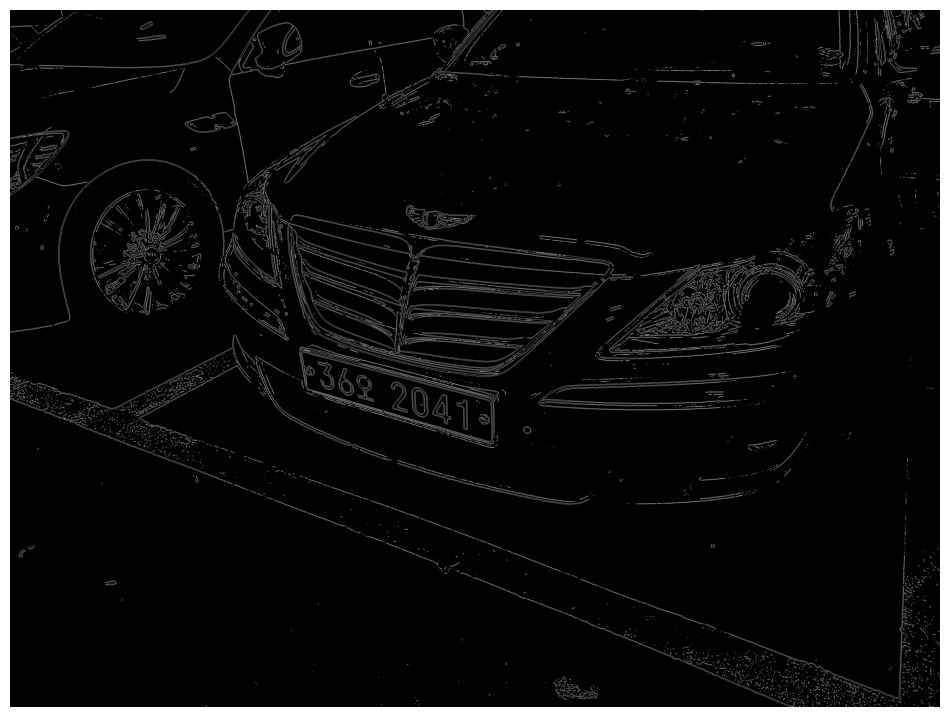

In [7]:
contours,_= cv2.findContours(
    imgBlurThresh,
    mode=cv2.RETR_LIST,
    method=cv2.CHAIN_APPROX_SIMPLE
)
# 파인드콘투어는 2차원 자료를 제공한다. ,_는 하이어라키 정보가 들어가는 곳이다.
# print(contours)

# 도화지 만들기(원본크기를 참조한다.)
tempResult = np.zeros((height, width, channel), dtype=np.uint8)

# 파인드콘투어로 추출한 정보를 가지고 "선"을 그린다. 흰색(255,255,255)
cv2.drawContours(tempResult, contours=contours, contourIdx=-1, color=(255,255,255))

plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(tempResult)


## Prepare Data
---
### 필요한 부분만 추출하기 auto detecting


- 부스러기 삭제
- bounding box비율로 글자 객체만 추출

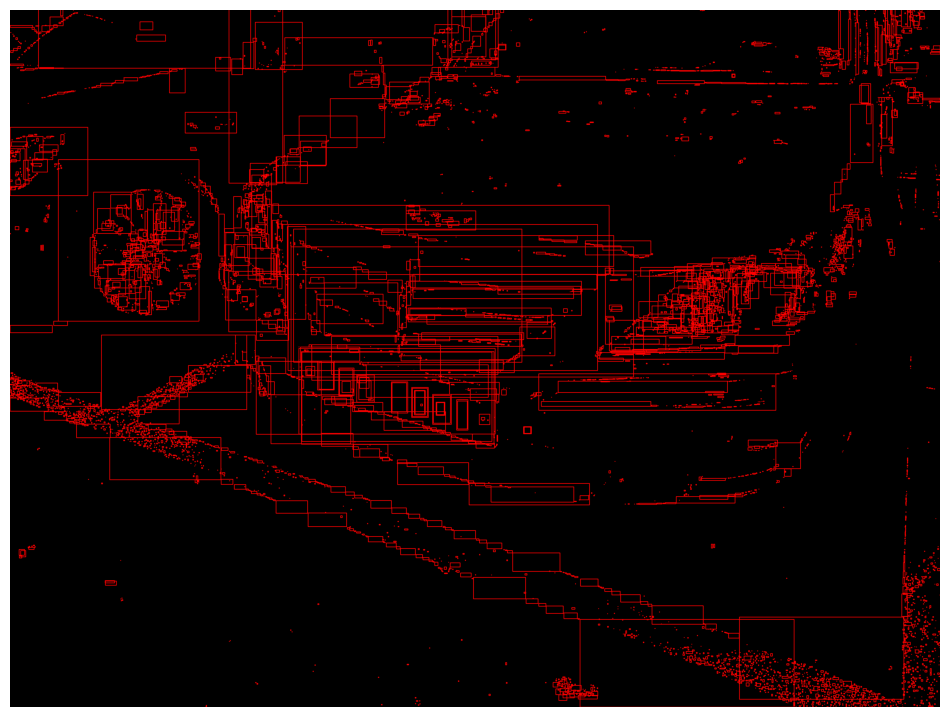

In [8]:
tempResult = np.zeros((height, width, channel), dtype=np.uint8)

contours_dict = []

# 바운딩렉트 메서드로 콘타객체를 둘러싼 사각형을 그려본다.(오토디텍트 1단계)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(tempResult, pt1=(x,y),pt2=(x+w, y+h), color=(255,0,0), thickness=2) # 콘타에 사각형그리기
    # 딕셔너리에 사각형 넣기
    contours_dict.append({
        'contour':contour,
        'x' : x,
        'y' : y,
        'w' : w,
        'h' : h,
        'cx': x + (w/2),    # 가로중심
        'cy': y + (h/2)    # 세로중심
    })

plt.figure(figsize=(12,10))
plt.axis('off')
plt.imshow(tempResult)

[{'contour': array([[[1969, 1699]],

       [[1970, 1698]],

       [[1975, 1698]],

       [[1977, 1700]],

       [[1977, 1701]],

       [[1978, 1702]],

       [[1978, 1706]],

       [[1977, 1707]],

       [[1977, 1709]],

       [[1978, 1710]],

       [[1978, 1721]],

       [[1979, 1722]],

       [[1979, 1730]],

       [[1978, 1731]],

       [[1978, 1732]],

       [[1979, 1733]],

       [[1979, 1747]],

       [[1978, 1748]],

       [[1978, 1750]],

       [[1979, 1751]],

       [[1979, 1785]],

       [[1980, 1786]],

       [[1980, 1788]],

       [[1979, 1789]],

       [[1979, 1791]],

       [[1980, 1792]],

       [[1980, 1798]],

       [[1981, 1799]],

       [[1981, 1800]],

       [[1980, 1801]],

       [[1980, 1805]],

       [[1979, 1806]],

       [[1979, 1810]],

       [[1980, 1811]],

       [[1980, 1817]],

       [[1979, 1818]],

       [[1977, 1818]],

       [[1976, 1817]],

       [[1973, 1817]],

       [[1971, 1815]],

       [[1971, 1814]],

   

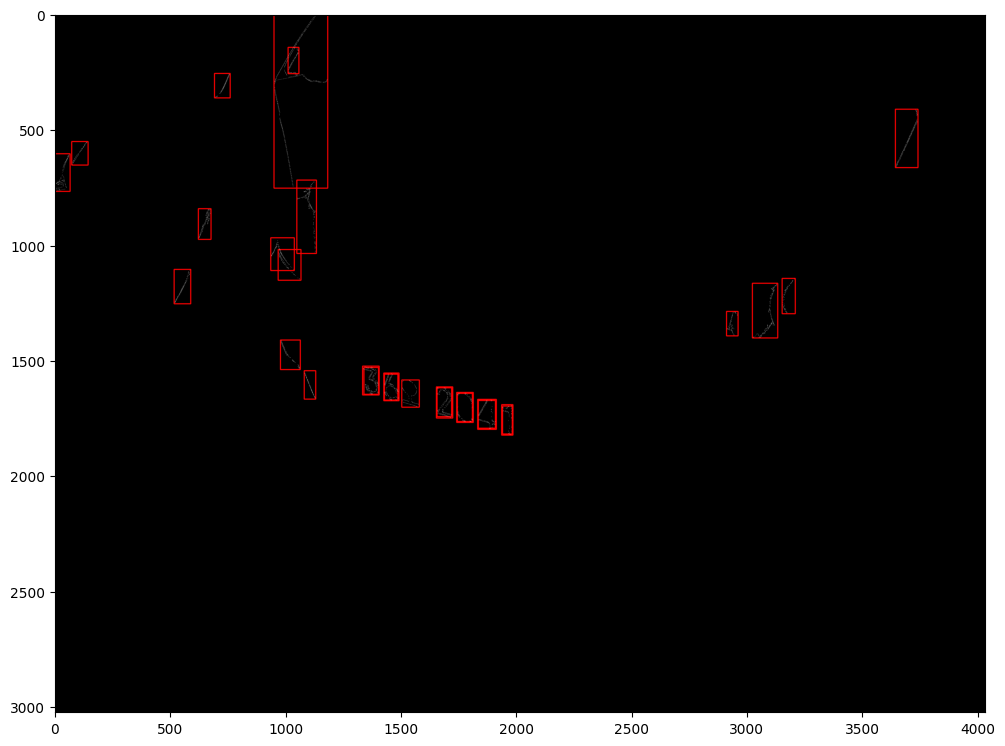

In [12]:
MIN_AREA = 5000                   # 기본값 80
MIN_WIDTH, MIN_HEIGHT = 30, 100       # 기본값 2, 8
MIN_RATIO, MAX_RATIO = 0.25, 0.75   # 기본값 0.25 1.0 숫자가 가진 일정한 비율이 있다. 너무 납작, 길쭉한 것은 제외할 것임

possible_contours =[]

cnt = 0
for d in contours_dict:
    # print(d)
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']

    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH \
    and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO :   # 조그만 객체(paricle:부스러기)들은 제외, 가로세로비율이 적당한 것 추출
        d['idx'] = cnt   # 각 윤곽선의 인덱스를 만들고, 나중에 조건에 맞는 윤곽선의 인덱스만 추출할 것임
        cnt +=1
        possible_contours.append(d)

# 정리된 콘타만 보이게 하기
tempResult = np.zeros((height, width, channel), dtype=np.uint8)

for d in possible_contours:
    cv2.drawContours(tempResult, d['contour'],-1,(255,255,255))
    cv2.rectangle(tempResult, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']),
                   color=(255,0,0), thickness=3)

plt.figure(figsize=(12,10))
plt.imshow(tempResult)
print(possible_contours)


### 정렬상태로 번호판 검출

In [55]:
# 기본 파라미터(6개)
MAX_DIAG_MULTIPLYER = 4    # 콘타중심간 거리가 너무 멀면 안된다.
MAX_ANGLE_DIFF = 16.0      # 콘타중심간 기울기 너무 기울어지면 안된다.
MAX_AREA_DIFF = 1.5        # 면적차이(defaut : 0.5)
MAX_WIDTH_DIFF = 1.0       # 폭의 차이(defaut : 1.0)
MAX_HEIGHT_DIFF = 0.5      # 높이의 차이(defaut : 0.5)
MIN_N_MATCHED = 4          # 최종후보군 무리가 3개초과 되어야 함. 번호판은 4글자이상이다.

def find_chars(contour_list):    # 재귀함수(recursive)를 사용하기 위해 함수로 지정
    matched_result_idx = []

    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:   # 만약 같은 콘타를 비교하려면 넘겨버린다.(비교불필요)
                continue

            dx = abs(d1['cx']-d2['cx'])
            dy = abs(d1['cy']-d2['cy'])

            diagonal_length1 = np.sqrt(d1['w']**2 + d1['h']**2)   # boundingBox의 대각선 길이
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']])-np.array([d2['cx'], d2['cy']])) 
            # lin--alg : 선형대수 알고리즘, 선형방정식 해구하기, 특이값분해, 고윳값분해
            # norm은 행렬의 크기를 구하는 메서드
            if dx ==0:
                angle_diff = 90  # 아크탄젠트 구할 때 dx가 0이되면 분모가 0이되어, 오류발생
            else:
                angle_diff = np.degrees(np.arctan(dy/dx))  # 아크탄젠트로 각도를 역으로 구한다. 라디안-도
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            # 다음조건에 맞는 객체만 matched_contour에 넣어준다.
            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF \
            and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF \
            and height_diff < MAX_HEIGHT_DIFF :
                matched_contours_idx.append(d2['idx'])
            
        matched_contours_idx.append(d1['idx'])
        

        if len(matched_contours_idx) < MIN_N_MATCHED :
            continue                                   # 갯수가 최소갯수(3개)보다 적으면 탈락

        matched_result_idx.append(matched_contours_idx)   # 통과된 놈들은 최종후보군에 합류

        unmatched_contours_idx =[]                      # 탈락자들 별도로 리스트만들기
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contours_idx.append(d4['idx'])


        # take 함수 : 두개 비교해서 같은 인덱스 값 추출 --> 재귀함수에 돌릴 재료
        unmached_contour = np.take(possible_contours, unmatched_contours_idx) 

        # 재귀함수
        recursive_contour_list = find_chars(unmached_contour)

        for idx in recursive_contour_list:
            matched_result_idx.append(idx)
        
        break
    return matched_result_idx
# 여기까지 문자찾기(find_chars())함수 정의

In [56]:
result_idx = find_chars(possible_contours)

matched_result =[]

for idx_list in result_idx :
    matched_result.append(np.take(possible_contours, idx_list))

#### 결과값 다시 그려보기

In [ ]:
tempResult = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result :
    for d in r :
         # cv2.drawContours(tempResult, d['contour'],-1,(255,255,255))
        cv2.rectangle(tempResult, pt1=(d['x'], d['y']), pt2=(d['x'] + d['w'], d['y'] + d['h']),
                   color=(255,0,0), thickness=3)

plt.figure(figsize=(12,10))
plt.imshow(tempResult)

## Rotate Plate Images(글자 회전)

In [61]:
PLATE_WIDTH_PADDING = 1.3
PLATE_HEIGHT_PADDING = 1.3
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_info = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key=lambda x:x['cx'])   # 뒤죽박죽인 순서를 정렬해준다.x점을 참고해 순서대로 정리

    plate_cx = (sorted_chars[0]['cx']+sorted_chars[-1]['cx'])/2   # 플레이트 센터중심좌표 구하기(0:첫번째글자, -1:마지막글자)
    plate_cy = (sorted_chars[0]['cy']+sorted_chars[-1]['cy'])/2   # 플레이트 센터중심좌표 구하기

    plate_width =(sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING  # 플레이트 전체 폭을 구한다. 여유치 30%

    sum_height = 0
    for d in sorted_chars:
         sum_height += d['h']

    plate_height = int(sum_height/ len(sorted_chars)*PLATE_HEIGHT_PADDING)  #플레이트 전체 높이를 구한다.

    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy']
    triangle_hypotenus = np.linalg.norm(
         np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) -
         np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])
    )






